In [9]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("supply_chain_data.csv")
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [11]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [ ]:
# Plotting relationship between price and revenue of the product.

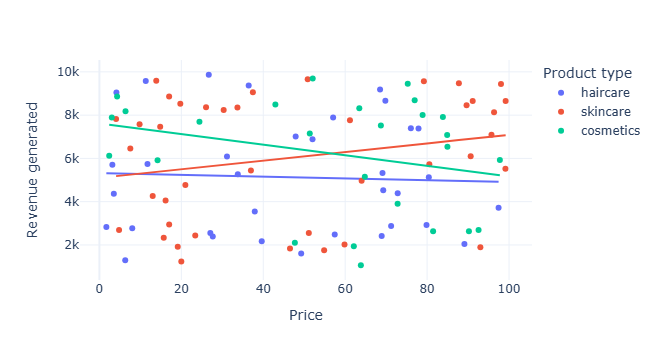

In [15]:
fig = px.scatter(data, x='Price', 
                 y='Revenue generated', 
                 color='Product type', 
                 hover_data=['Number of products sold'], 
                 trendline="ols")
fig.show()

In [ ]:
# Skincare products contribute the most to the company revenue.

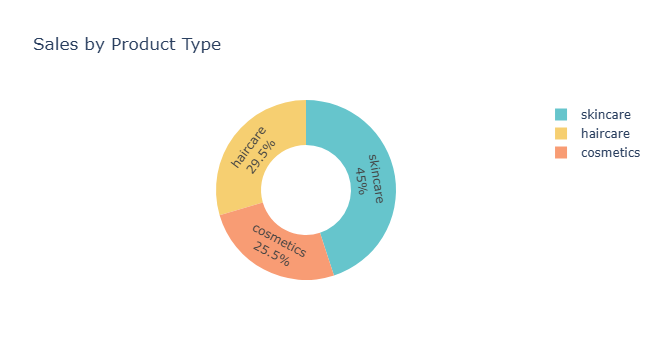

In [17]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
                   
pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [ ]:
# Of all the sales 45% - Skincare products ,29.5% - haircare, 25.5% - Cosmetics
# Next we have total revenue by shipping carriers.

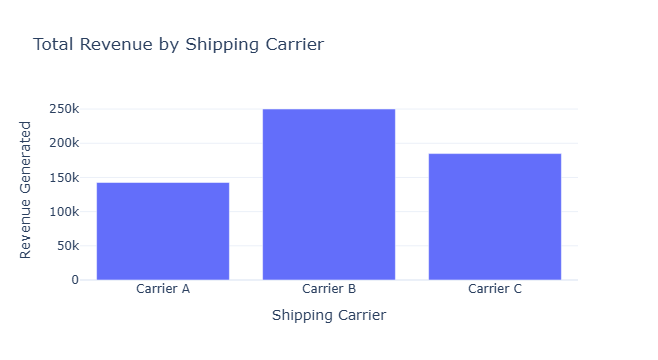

In [37]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'], 
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier', 
                  xaxis_title='Shipping Carrier', 
                  yaxis_title='Revenue Generated')
fig.show()

In [ ]:
# Out of all the carriers, Carrier B generates the highest revenue.

In [21]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


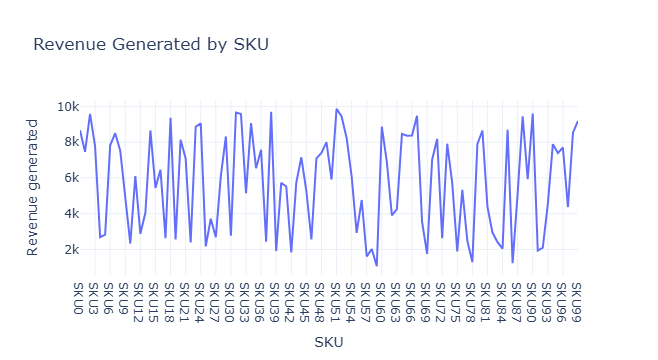

In [23]:
revenue_chart = px.line(data, x='SKU', 
                        y='Revenue generated', 
                        title='Revenue Generated by SKU')
revenue_chart.show()


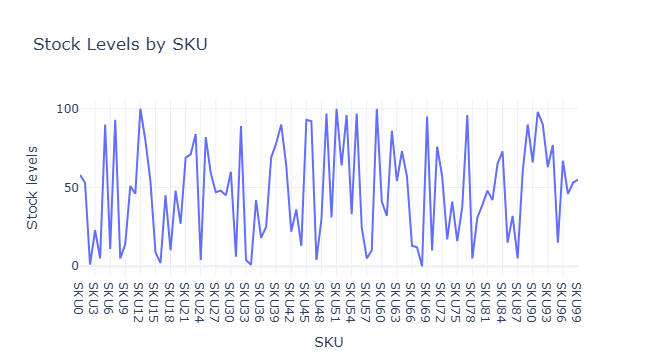

In [25]:
stock_chart = px.line(data, x='SKU', 
                      y='Stock levels', 
                      title='Stock Levels by SKU')
stock_chart.show()

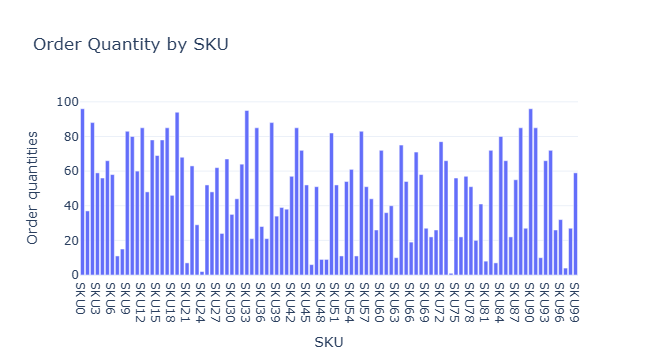

In [27]:
order_quantity_chart = px.bar(data, x='SKU', 
                              y='Order quantities', 
                              title='Order Quantity by SKU')
order_quantity_chart.show()

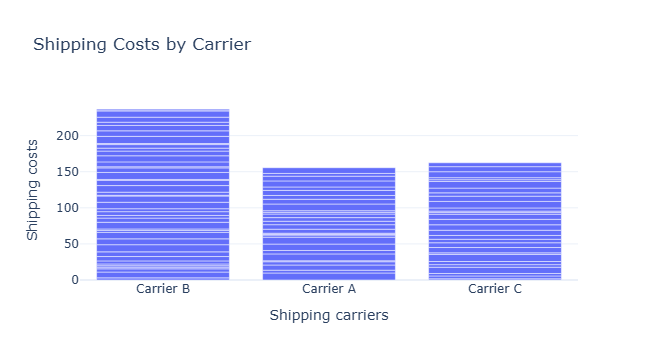

In [29]:
shipping_cost_chart = px.bar(data, x='Shipping carriers', 
                             y='Shipping costs', 
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

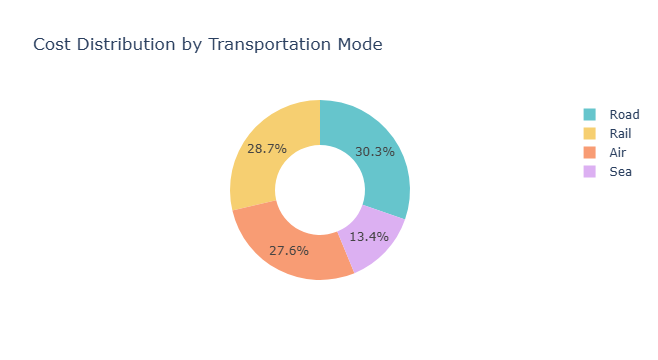

In [31]:
transportation_chart = px.pie(data, 
                              values='Costs', 
                              names='Transportation modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

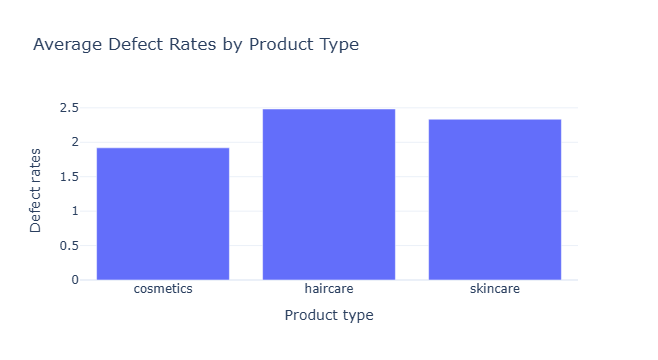

In [33]:
#Analisying Defect Rate (% Of Defective Products)

defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

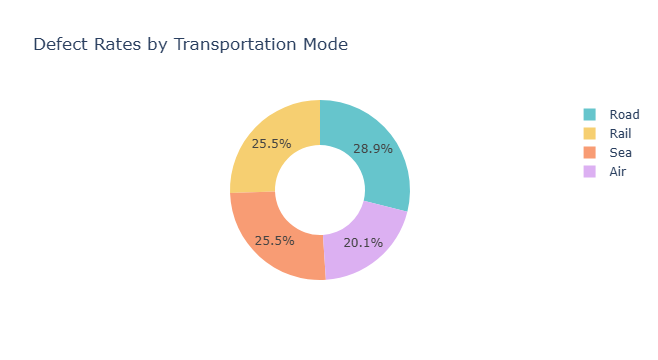

In [35]:
pivot_table = pd.pivot_table(data, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()